In [2]:
import networkx as nx
import pickle

In [26]:
G = pickle.load(open("../data/trimmed_networks_pkl/2_simple_disparity_filter.pkl", "rb"))

# pick largest connected component, this removes orphaned nodes as well
G = G.subgraph(max(nx.connected_components(G), key=len))

In [27]:
G.number_of_nodes()

14630

In [36]:
import matplotlib.pyplot as plt

In [70]:
degree_hist = nx.degree_histogram(G)
total_degree = 2*G.number_of_edges()
pdf = [x/total_degree for x in degree_hist]
ccdf = [sum(pdf[i:]) for i in range(len(pdf))]

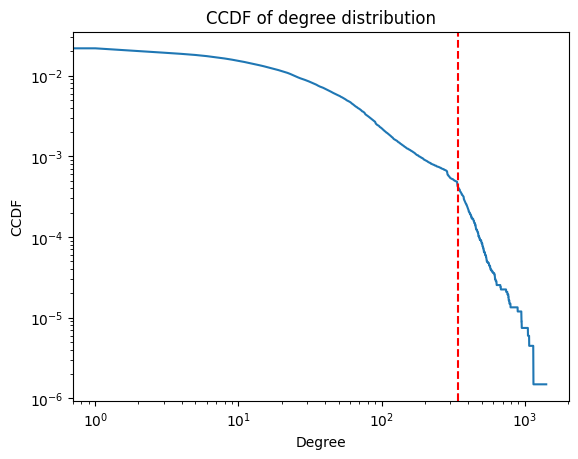

In [80]:
plt.figure()
plt.plot(ccdf)
plt.yscale('log')
plt.xscale('log')
plt.title("CCDF of degree distribution")
plt.xlabel("Degree")
plt.ylabel("CCDF")
# plot a vertical line at 418
plt.axvline(x=340, color='r', linestyle='--')
plt.show()

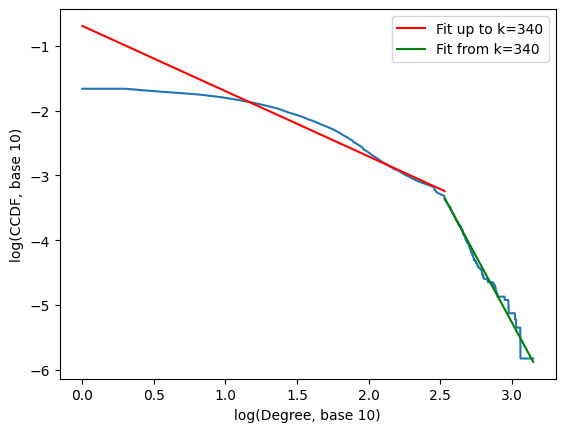

In [112]:

import numpy as np
from scipy.stats import linregress

x = np.log(range(1, len(ccdf)+1)) / np.log(10)
y = np.log(ccdf) / np.log(10)
# Fit linear regression up to x=340
x1 = x[:340]
y1 = y[:340]
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, y1)

# Fit linear regression from x=340
x2 = x[340:]
y2 = y[340:]
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

# Plot the two linear regressions
plt.figure()
plt.plot(x, y)
plt.plot(x1, slope1 * x1 + intercept1, label='Fit up to k=340', color='red')
plt.plot(x2, slope2 * x2 + intercept2, label='Fit from k=340', color='green')
plt.xlabel("log(Degree, base 10)")
plt.ylabel("log(CCDF, base 10)")
plt.legend()


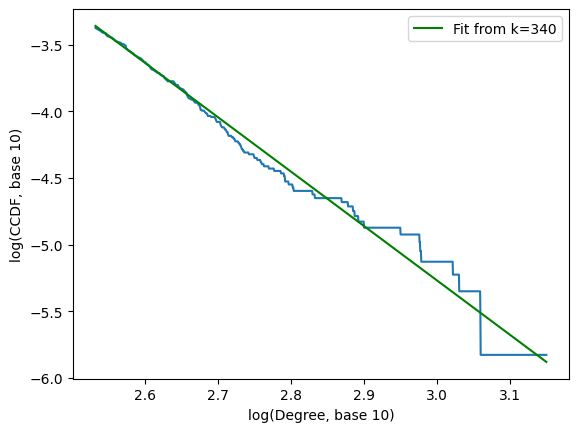

In [111]:
# plot only from x=340
plt.figure()
plt.plot(x2, y2)
plt.plot(x2, slope2 * x2 + intercept2, label='Fit from k=340', color='green')
plt.xlabel("log(Degree, base 10)")
plt.ylabel("log(CCDF, base 10)")
plt.legend()
plt.show()

In [117]:
import powerlaw as pl
results = pl.Fit(ccdf)
k_min = ccdf.index(results.power_law.xmin)
print(
    "Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)"
    % (10**results.power_law.Kappa, results.power_law.alpha, k_min)
)

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 10.2649 x ^ -1.9014 (k_min = 287)


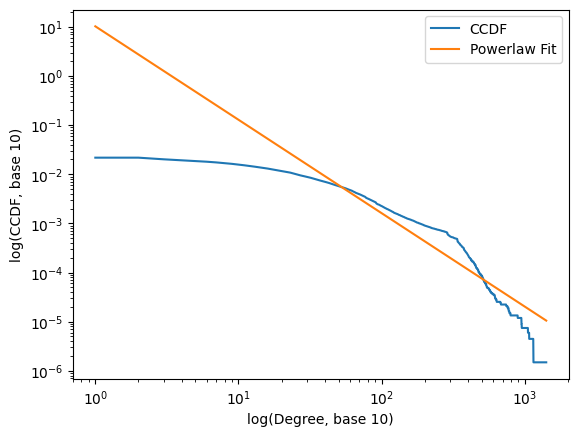

In [118]:
degrees = np.array(range(1, len(ccdf)+1))
x = (10**results.power_law.Kappa) * (degrees ** -results.power_law.alpha)

plt.figure()
plt.plot(degrees, ccdf, label="CCDF")
plt.plot(degrees, x, label="Powerlaw Fit")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(Degree, base 10)")
plt.ylabel("log(CCDF, base 10)")
plt.legend()
plt.show()



In [125]:
print(results.distribution_compare("power_law", "truncated_power_law"))


Assuming nested distributions


(np.float64(-7.210545101640917), np.float64(0.00014615626103509083))


In [129]:
results.distribution_compare("lognormal", "power_law")

(np.float64(3.010637633927426), np.float64(0.0831171087789867))

In [128]:

results.distribution_compare("lognormal", "truncated_power_law")

(np.float64(-4.199907467713494), np.float64(3.2582082843509727e-06))